<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/dave-updates/code/dave-Sentence-Embedding-Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import spacy
from sklearn.cluster import KMeans

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
train = pd.read_csv('drive/Shareddrives/Milestone 2/Training_set.csv', 
                      sep='\t',index_col='ix')
train['lemmatized_text'] = train['lemmatized_text'].fillna('')

In [237]:
sample_df = train.groupby('label').apply(lambda x: x.sample(2500, random_state=99))

In [238]:
sample_df.label.value_counts()

0    2500
1    2500
Name: label, dtype: int64

In [239]:
nlp = spacy.load("en_core_web_sm")

In [240]:
sample_df['embedding'] =  (sample_df['lemmatized_text']
                           .apply(lambda doc: nlp(doc).vector))

In [241]:
X = np.array([x for x in sample_df['embedding']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [243]:
X

array([array([ 0.01823193,  0.4154876 ,  0.7377034 , -0.2962893 , -0.23702231,
              -0.06604573, -0.61949396, -0.4244492 ,  0.44684976,  0.2585516 ,
               0.29039913, -0.13762945, -0.12475292, -0.3482426 ,  0.08243544,
              -0.01295885, -0.07908605,  0.09828032, -0.07869907, -0.02076909,
               0.09553783, -0.10050287,  0.01984699,  0.7526506 ,  0.02659307,
               0.08573489, -0.0826791 , -0.23625156, -0.40657672,  0.1541268 ,
               0.12819819,  0.38742313, -0.72350156, -0.6194456 ,  0.31610247,
               0.10758962, -0.4342197 ,  0.25259185, -0.165194  ,  0.18970971,
               0.5759415 ,  0.47506452, -0.2081238 , -0.44306523,  0.15650329,
              -0.07555199,  0.33519742,  0.5402867 , -0.25004014, -0.2961595 ,
               0.46286035, -0.1706211 , -0.05973683, -0.2041003 , -0.24140687,
               0.09916173,  0.46397457, -0.03801919, -0.07418916, -0.10266594,
              -0.2281745 , -0.2670276 , -0.05990433,

In [242]:
km = KMeans(n_clusters=2, random_state=99)
km.fit(X)

ValueError: ignored

In [206]:
km.labels_

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

In [207]:
sample_df['cluster'] = km.labels_

In [208]:
np.bincount(km.labels_)

array([42, 55,  2,  1])

In [232]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [233]:
X_std = StandardScaler().fit_transform(X)

In [234]:

X_pca = PCA(n_components=2).fit_transform(X_std)

In [64]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


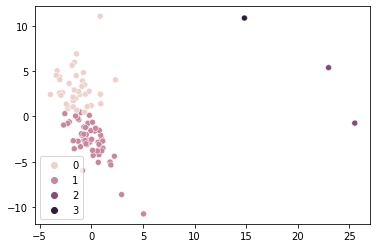

In [236]:
sns.scatterplot(X_pca[:,0],
                X_pca[:,1],
                hue=km.labels_)

In [230]:
km.labels_.shape

(100,)

In [215]:
sample_df[sample_df['cluster']==0]

original_text  \
label ix                                                          
0     256892  He studied art in Berlin , Essen , and Munich ...   
      336467                      Communist Hungary , 1946-1989   
      397787  March 12 - Tirso de Molina , Spanish dramatist...   
      346954  Office buildings in Shanghai , including the J...   
      262288  Frank Mill -LRB- born 23 July , 1958 -RRB- is ...   
      350797  Lagorce is a commune in the ArdÃ che dÃ partem...   
      317342  Soundgarden released its debut album , Ultrame...   
      322737  The anti-nuclear movement grew in California b...   
      289026  Texas A&M University is a public university in...   
      279584  The KPD expelled him in January 1922 , and lat...   
      256177  Lomana LuaLua -LRB- born 28 December 1980 -RRB...   
      213620  Aetingen is a municipality in the district Buc...   
      358657  Addis Ababa -LRB- spelled Addis Abeba by the E...   
      260702  In the feud , Cena lost his United States Cham...   
      312559  Lilly went to the Chapin School in New York Ci...   
      270794  Since Delgadillo 's death in 2004 , the Snow C...   
      330407  Horcoff played college hockey at Michigan Stat...   
      287123  The Hundred Years War -LRB- c. 1337 -- 1453 -R...   
      214516  Masaki Tsuchihashi -LRB- born 23 July 1972 -RR...   
1     48508   He studied art in Berlin , Essen , and Munich ...   
      128083  -LRB-/O2002/O-RRB- , Chuck -LRB-/O2004/O-RRB- ...   
      204756  Hongwu -LRB- also known as Zhu Yuanzhang -RRB-...   
      189403  Time Asia : Asians of the Century , August 199...   
      138570  Aziz Mian was born as Abdul Aziz -LRB- Urdu : ...   
      53904   Frank Mill -LRB- born 23 July 1958 in Essen -R...   
      108958  German Michael Schumacher broke Prost 's recor...   
      148412  He then moved to St Aloysius ' College in Horn...   
      80642   Texas A&M University , often referred to as A&...   
      47793   Lomana Trésor LuaLua -LRB- , born 28 December ...   
      183094  After Washington , D.C. , became the capital i...   
      5236    Aetingen is a municipality in the district of ...   
      72957   EstÃ dio Palestra ItÃ lia , located in SÃ # o ...   
      150273  It became her last completed film . The Misfit...   
      97665   Lebanon Junction is a city in Bullitt County ,...   
      52318   In the feud , Cena lost his United States Cham...   
      104175  Hans Richter -LRB- János Richter -RRB- -LRB- 4...   
      122023  Lignières-la-Carelle is a commune in the Sarth...   
      78739   The Hundred Years ' War -LRB- c. 1337 -- 1453 ...   
      6132    Masaki Tsuchihashi -LRB- born July 23 , 1972 -...   
      174321  The '' Stars of the White Nights Festival '' r...   
      82079   The Bengal tiger , or Royal Bengal tiger -LRB-...   
      2797    Bryan Owen '' Pete '' Young -LRB- born March 1...   

                                                lemmatized_text  \
label ix                                                          
0     256892  he study art in berlin essen and munich before...   
      336467                         communist hungary 19461989   
      397787  march 12 tirso de molina spanish dramatist and...   
      346954  office buildings in shanghai include the jin m...   
      262288  frank mill lrb bear 23 july 1958 rrb be a form...   
      350797  lagorce be a commune in the ard che d partemen...   
      317342  soundgarden release it debut album ultramega o...   
      322737  the antinuclear movement grow in california be...   
      289026  texas be university be a public university in ...   
      279584  the kpd expel he in january 1922 and late that...   
      256177  lomana lualua lrb bear 28 december 1980 rrb be...   
      213620  aetingen be a municipality in the district buc...   
      358657  addis ababa lrb spell addis abeba by the ethio...   
      260702  in the feud cena lose he united state champion...   
      312559  lilly go to the

In [93]:
np.mean(vecs, axis=1)

array([-0.00546921, -0.00127675], dtype=float32)